In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/12_Dec.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,12.500000,77.000000,1,6,1,1847.0,1849.0,1961.0,1673.0,1619.0,1562.0,1841.333333,1720.0
1,12.375000,76.916667,1,6,1,1807.0,1867.0,1931.0,1642.0,1573.0,1520.0,1821.333333,1691.0
2,12.250000,76.833333,1,6,1,1778.0,1876.0,1908.0,1626.0,1559.0,1500.0,1801.666667,1672.0
3,12.125000,76.750000,1,6,1,1754.0,1876.0,1883.0,1621.0,1546.0,1497.0,1782.166667,1649.0
4,12.000000,76.666667,2,6,1,1720.0,1847.0,1849.0,1569.0,1533.0,1487.0,1764.416667,1636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,5.842452,89.215220,23,3,1,1985.0,2067.0,2151.0,1827.0,1683.0,1801.0,2005.666667,1858.0
8924,5.842452,89.215220,24,3,1,1957.0,2055.0,2107.0,1806.0,1662.0,1781.0,1982.500000,1829.0
8925,5.842452,89.215220,24,3,1,1910.0,2052.0,2090.0,1759.0,1623.0,1748.0,1956.500000,1778.0
8926,5.500000,89.215220,24,3,1,1877.0,2024.0,2086.0,1719.0,1620.0,1735.0,1930.583333,1775.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.337721,-0.585566,0.665774,-1.660699,0.957785,0.697146,0.141279,0.148193,0.571310,-0.535512,-0.745046,-0.962714,0.125800
1,-0.447299,-0.615791,0.660902,-1.660699,0.957785,0.697146,-0.009948,0.216267,0.457811,-0.652957,-0.919828,-1.122742,0.046314
2,-0.519092,-0.646016,0.656031,-1.660699,0.957785,0.697146,-0.119588,0.250304,0.370794,-0.713573,-0.973023,-1.198947,-0.031847
3,-0.605999,-0.676241,0.651160,-1.660699,0.957785,0.697146,-0.210325,0.250304,0.276212,-0.732516,-1.022418,-1.210377,-0.109346
4,-0.655121,-0.706466,0.646289,-1.516262,0.957785,0.697146,-0.338868,0.140629,0.147579,-0.929520,-1.071813,-1.248479,-0.179890


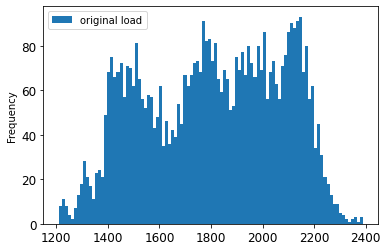

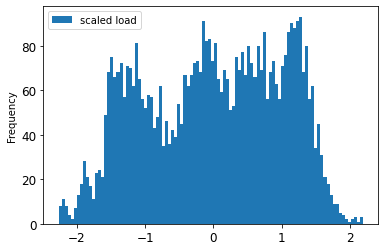

In [8]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

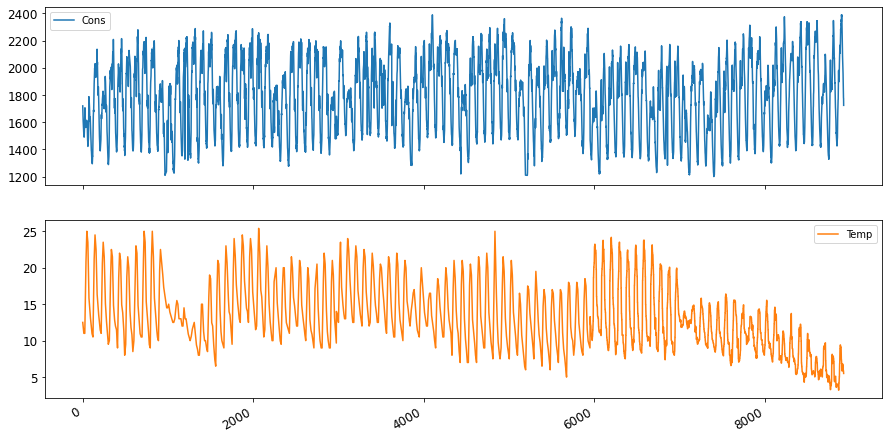

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.337721,-0.585566,0.665774,-1.660699,0.957785,0.697146,0.141279,0.148193,0.571310,-0.535512,-0.745046,-0.962714,0.125800,-0.447299
1,-0.447299,-0.615791,0.660902,-1.660699,0.957785,0.697146,-0.009948,0.216267,0.457811,-0.652957,-0.919828,-1.122742,0.046314,-0.519092
2,-0.519092,-0.646016,0.656031,-1.660699,0.957785,0.697146,-0.119588,0.250304,0.370794,-0.713573,-0.973023,-1.198947,-0.031847,-0.605999
3,-0.605999,-0.676241,0.651160,-1.660699,0.957785,0.697146,-0.210325,0.250304,0.276212,-0.732516,-1.022418,-1.210377,-0.109346,-0.655121
4,-0.655121,-0.706466,0.646289,-1.516262,0.957785,0.697146,-0.338868,0.140629,0.147579,-0.929520,-1.071813,-1.248479,-0.179890,-0.757142
5,-0.757142,-0.736691,0.641418,-1.516262,0.957785,0.697146,-0.448508,-0.010647,0.215678,-1.058331,-1.170603,-1.358975,-0.265337,-0.806264
6,-0.806264,-0.766916,0.636547,-1.516262,0.957785,0.697146,-0.520341,-0.120323,0.249728,-0.971194,-1.208599,-1.496143,-0.358071,-0.836492
7,-0.836492,-0.797141,0.631676,-1.516262,0.957785,0.697146,-0.607297,-0.211088,0.249728,-0.948463,-1.303590,-1.442800,-0.453454,-0.900728
8,-0.900728,-0.827365,0.626804,-1.371824,0.957785,0.697146,-0.656446,-0.339673,0.140012,-1.054542,-1.322588,-1.499953,-0.544863,-0.972521
9,-0.972521,-0.857590,0.621933,-1.371824,0.957785,0.697146,-0.758524,-0.449349,-0.011320,-1.077273,-1.341586,-1.522814,-0.629317,-1.002749


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,0.361315,-1.376910,0.979298,1.372490,0.957785,0.697146,0.205551,0.730607,1.165290,0.438144,0.539226,0.515647,0.556350,0.315972
4984,0.315972,-1.398892,1.005868,1.516927,0.957785,0.697146,0.046762,0.632277,1.048008,0.320699,0.478432,0.374669,0.492098,0.202615
4985,0.202615,-1.420873,1.032438,1.516927,0.957785,0.697146,0.326533,0.397799,0.960991,0.305545,0.330247,0.245122,0.425529,0.183722
4986,0.183722,-1.442855,1.059008,1.516927,0.957785,0.697146,0.398366,0.337288,0.904242,0.301756,0.212458,0.210831,0.362271,0.134601
4987,0.134601,-1.464837,1.085578,1.516927,0.957785,0.697146,0.360559,0.204921,0.730209,0.100964,0.136466,0.069853,0.309943,-0.137457
4988,-0.137457,-1.486819,1.112148,1.661365,0.957785,0.697146,0.315191,0.046081,0.631843,-0.031635,-0.019318,-0.082556,0.242380,-0.197914
4989,-0.197914,-1.508800,1.138718,1.661365,0.957785,0.697146,0.201770,0.325942,0.397278,-0.202120,-0.197901,-0.257825,0.190052,-0.367949
4990,-0.367949,-1.530782,1.165288,1.661365,0.957785,0.697146,0.182867,0.397799,0.336745,-0.349873,-0.410679,-0.429285,0.128119,-0.530428
4991,-0.530428,-1.552764,1.191858,1.661365,0.957785,0.697146,0.133718,0.359980,0.204329,-0.448375,-0.452475,-0.615985,0.063536,-0.621114
4992,-0.621114,-1.552764,1.191858,-1.660699,1.446215,-1.434421,-0.138491,0.314597,0.045429,-0.550666,-0.710849,-0.711240,0.004915,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,0.361315,-1.376910,0.979298,1.372490,0.957785,0.697146,0.205551,0.730607,1.165290,0.438144,0.539226,0.515647,0.556350,0.315972
4984,0.315972,-1.398892,1.005868,1.516927,0.957785,0.697146,0.046762,0.632277,1.048008,0.320699,0.478432,0.374669,0.492098,0.202615
4985,0.202615,-1.420873,1.032438,1.516927,0.957785,0.697146,0.326533,0.397799,0.960991,0.305545,0.330247,0.245122,0.425529,0.183722
4986,0.183722,-1.442855,1.059008,1.516927,0.957785,0.697146,0.398366,0.337288,0.904242,0.301756,0.212458,0.210831,0.362271,0.134601
4987,0.134601,-1.464837,1.085578,1.516927,0.957785,0.697146,0.360559,0.204921,0.730209,0.100964,0.136466,0.069853,0.309943,-0.137457
4988,-0.137457,-1.486819,1.112148,1.661365,0.957785,0.697146,0.315191,0.046081,0.631843,-0.031635,-0.019318,-0.082556,0.242380,-0.197914
4989,-0.197914,-1.508800,1.138718,1.661365,0.957785,0.697146,0.201770,0.325942,0.397278,-0.202120,-0.197901,-0.257825,0.190052,-0.367949
4990,-0.367949,-1.530782,1.165288,1.661365,0.957785,0.697146,0.182867,0.397799,0.336745,-0.349873,-0.410679,-0.429285,0.128119,-0.530428
4991,-0.530428,-1.552764,1.191858,1.661365,0.957785,0.697146,0.133718,0.359980,0.204329,-0.448375,-0.452475,-0.615985,0.063536,-0.621114
4992,-0.621114,-1.552764,1.191858,-1.660699,1.446215,-1.434421,-0.138491,0.314597,0.045429,-0.550666,-0.710849,-0.711240,0.004915,-0.621114


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-0.447299
1,-0.519092
2,-0.605999
3,-0.655121
4,-0.757142
...,...
4988,-0.197914
4989,-0.367949
4990,-0.530428
4991,-0.621114


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.337721,-0.585566,0.665774,-1.660699,0.957785,0.697146,0.141279,0.148193,0.571310,-0.535512,-0.745046,-0.962714,0.125800
1,-0.447299,-0.615791,0.660902,-1.660699,0.957785,0.697146,-0.009948,0.216267,0.457811,-0.652957,-0.919828,-1.122742,0.046314
2,-0.519092,-0.646016,0.656031,-1.660699,0.957785,0.697146,-0.119588,0.250304,0.370794,-0.713573,-0.973023,-1.198947,-0.031847
3,-0.605999,-0.676241,0.651160,-1.660699,0.957785,0.697146,-0.210325,0.250304,0.276212,-0.732516,-1.022418,-1.210377,-0.109346
4,-0.655121,-0.706466,0.646289,-1.516262,0.957785,0.697146,-0.338868,0.140629,0.147579,-0.929520,-1.071813,-1.248479,-0.179890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,-0.137457,-1.486819,1.112148,1.661365,0.957785,0.697146,0.315191,0.046081,0.631843,-0.031635,-0.019318,-0.082556,0.242380
4989,-0.197914,-1.508800,1.138718,1.661365,0.957785,0.697146,0.201770,0.325942,0.397278,-0.202120,-0.197901,-0.257825,0.190052
4990,-0.367949,-1.530782,1.165288,1.661365,0.957785,0.697146,0.182867,0.397799,0.336745,-0.349873,-0.410679,-0.429285,0.128119
4991,-0.530428,-1.552764,1.191858,1.661365,0.957785,0.697146,0.133718,0.359980,0.204329,-0.448375,-0.452475,-0.615985,0.063536


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4993, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <=5952)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,1627.0,8.416667,86.000000,1.0,7.0,0.0,1757.0,1863.0,1896.0,1634.0,1597.0,1609.0,1788.500000
4994,1617.0,8.333333,86.000000,1.0,7.0,0.0,1712.0,1858.0,1915.0,1620.0,1603.0,1601.0,1763.666667
4995,1586.0,8.250000,86.000000,1.0,7.0,0.0,1669.0,1845.0,1905.0,1594.0,1567.0,1576.0,1737.083333
4996,1544.0,8.166667,86.000000,2.0,7.0,0.0,1645.0,1773.0,1893.0,1569.0,1534.0,1559.0,1708.000000
4997,1527.0,8.083333,86.000000,2.0,7.0,0.0,1627.0,1757.0,1863.0,1556.0,1514.0,1515.0,1680.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,1851.0,9.130435,73.333333,24.0,2.0,1.0,1942.0,1954.0,2078.0,1688.0,1833.0,1875.0,1944.416667
5949,1797.0,9.086957,73.250000,24.0,2.0,1.0,1935.0,1952.0,2043.0,1662.0,1794.0,1817.0,1923.916667
5950,1746.0,9.043478,73.166667,24.0,2.0,1.0,1855.0,1982.0,2017.0,1613.0,1757.0,1759.0,1901.333333
5951,1720.0,9.000000,73.083333,24.0,2.0,1.0,1849.0,1966.0,1987.0,1561.0,1736.0,1746.0,1879.083333


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-0.720750,-1.027610,1.013615,-1.661325,1.440017,-1.0,-0.225832,0.177668,0.303815,-0.718531,-0.872393,-0.828035,-0.110724
4994,-0.758744,-1.050622,1.013615,-1.661325,1.440017,-1.0,-0.396798,0.158664,0.376076,-0.771079,-0.850532,-0.857211,-0.209265
4995,-0.876524,-1.073635,1.013615,-1.661325,1.440017,-1.0,-0.560166,0.109254,0.338044,-0.868668,-0.981693,-0.948388,-0.314750
4996,-1.036097,-1.096648,1.013615,-1.516862,1.440017,-1.0,-0.651348,-0.164401,0.292405,-0.962504,-1.101924,-1.010388,-0.430156
4997,-1.100687,-1.119661,1.013615,-1.516862,1.440017,-1.0,-0.719734,-0.225213,0.178309,-1.011299,-1.174791,-1.170859,-0.541262
4998,-0.994304,-1.142674,1.013615,-1.516862,1.440017,-1.0,-0.757727,-0.396247,0.159293,-1.011299,-1.145644,-1.086976,-0.641457
4999,-1.032298,-1.165687,1.013615,-1.516862,1.440017,-1.0,-0.875503,-0.559679,0.109851,-1.041326,-1.149288,-1.094271,-0.740659
5000,-1.093088,-1.188700,1.013615,-1.372399,1.440017,-1.0,-1.035072,-0.650897,-0.163980,-1.078860,-1.142001,-1.145330,-0.821344
5001,-1.165276,-1.211713,1.013615,-1.372399,1.440017,-1.0,-1.099659,-0.719311,-0.224831,-1.146422,-1.233085,-1.167212,-0.903020
5002,-1.256461,-1.234726,1.013615,-1.372399,1.440017,-1.0,-0.993280,-0.757319,-0.395976,-1.247765,-1.309595,-1.229212,-0.977753


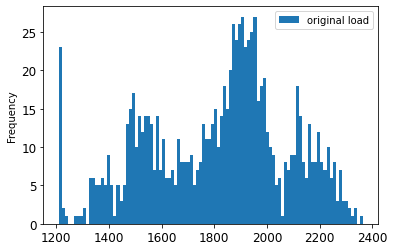

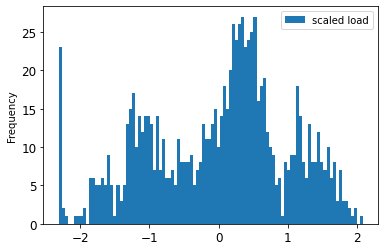

In [19]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5952)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5952)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-0.720750,-1.027610,1.013615,-1.661325,1.440017,-1.0,-0.225832,0.177668,0.303815,-0.718531,-0.872393,-0.828035,-0.110724,-0.758744
4994,-0.758744,-1.050622,1.013615,-1.661325,1.440017,-1.0,-0.396798,0.158664,0.376076,-0.771079,-0.850532,-0.857211,-0.209265,-0.876524
4995,-0.876524,-1.073635,1.013615,-1.661325,1.440017,-1.0,-0.560166,0.109254,0.338044,-0.868668,-0.981693,-0.948388,-0.314750,-1.036097
4996,-1.036097,-1.096648,1.013615,-1.516862,1.440017,-1.0,-0.651348,-0.164401,0.292405,-0.962504,-1.101924,-1.010388,-0.430156,-1.100687
4997,-1.100687,-1.119661,1.013615,-1.516862,1.440017,-1.0,-0.719734,-0.225213,0.178309,-1.011299,-1.174791,-1.170859,-0.541262,-0.994304
4998,-0.994304,-1.142674,1.013615,-1.516862,1.440017,-1.0,-0.757727,-0.396247,0.159293,-1.011299,-1.145644,-1.086976,-0.641457,-1.032298
4999,-1.032298,-1.165687,1.013615,-1.516862,1.440017,-1.0,-0.875503,-0.559679,0.109851,-1.041326,-1.149288,-1.094271,-0.740659,-1.093088
5000,-1.093088,-1.188700,1.013615,-1.372399,1.440017,-1.0,-1.035072,-0.650897,-0.163980,-1.078860,-1.142001,-1.145330,-0.821344,-1.165276
5001,-1.165276,-1.211713,1.013615,-1.372399,1.440017,-1.0,-1.099659,-0.719311,-0.224831,-1.146422,-1.233085,-1.167212,-0.903020,-1.256461
5002,-1.256461,-1.234726,1.013615,-1.372399,1.440017,-1.0,-0.993280,-0.757319,-0.395976,-1.247765,-1.309595,-1.229212,-0.977753,-1.279257


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5943,0.567236,-0.770466,0.152363,1.372399,-0.805624,1.0,0.647996,1.196270,1.581694,-0.140502,0.282552,0.328086,0.930900,0.476051
5944,0.476051,-0.782472,0.146504,1.516862,-0.805624,1.0,0.522620,0.994830,1.490417,-0.132995,0.337202,0.280674,0.842941,0.449455
5945,0.449455,-0.794479,0.140645,1.516862,-0.805624,1.0,0.515022,0.861804,1.330682,-0.196803,0.308055,0.240556,0.766555,0.145506
5946,0.145506,-0.806486,0.134787,1.516862,-0.805624,1.0,0.628999,0.762984,1.186160,-0.275625,0.282552,0.244204,0.676281,0.122710
5947,0.122710,-0.818492,0.128928,1.516862,-0.805624,1.0,0.568211,0.648961,1.197570,-0.384475,0.198755,0.196792,0.583031,0.130308
5948,0.130308,-0.830499,0.123069,1.661325,-0.805624,1.0,0.477029,0.523536,0.995999,-0.515845,-0.012560,0.142086,0.507968,-0.074857
5949,-0.074857,-0.842506,0.117210,1.661325,-0.805624,1.0,0.450435,0.515935,0.862887,-0.613434,-0.154651,-0.069444,0.426622,-0.268625
5950,-0.268625,-0.854513,0.111351,1.661325,-0.805624,1.0,0.146495,0.629958,0.764004,-0.797353,-0.289455,-0.280974,0.337009,-0.367409
5951,-0.367409,-0.866519,0.105492,1.661325,-0.805624,1.0,0.123699,0.569146,0.649907,-0.992531,-0.365966,-0.328386,0.248719,-1.237464
5952,-1.237464,0.318861,0.560238,-1.661325,-1.254752,-1.0,-0.932492,-0.692706,-0.266666,-1.131409,-1.061847,-1.159918,-0.837877,-1.237464


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4993,-0.758744
4994,-0.876524
4995,-1.036097
4996,-1.100687
4997,-0.994304
...,...
5948,-0.074857
5949,-0.268625
5950,-0.367409
5951,-1.237464


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-0.720750,-1.027610,1.013615,-1.661325,1.440017,-1.0,-0.225832,0.177668,0.303815,-0.718531,-0.872393,-0.828035,-0.110724
4994,-0.758744,-1.050622,1.013615,-1.661325,1.440017,-1.0,-0.396798,0.158664,0.376076,-0.771079,-0.850532,-0.857211,-0.209265
4995,-0.876524,-1.073635,1.013615,-1.661325,1.440017,-1.0,-0.560166,0.109254,0.338044,-0.868668,-0.981693,-0.948388,-0.314750
4996,-1.036097,-1.096648,1.013615,-1.516862,1.440017,-1.0,-0.651348,-0.164401,0.292405,-0.962504,-1.101924,-1.010388,-0.430156
4997,-1.100687,-1.119661,1.013615,-1.516862,1.440017,-1.0,-0.719734,-0.225213,0.178309,-1.011299,-1.174791,-1.170859,-0.541262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,0.130308,-0.830499,0.123069,1.661325,-0.805624,1.0,0.477029,0.523536,0.995999,-0.515845,-0.012560,0.142086,0.507968
5949,-0.074857,-0.842506,0.117210,1.661325,-0.805624,1.0,0.450435,0.515935,0.862887,-0.613434,-0.154651,-0.069444,0.426622
5950,-0.268625,-0.854513,0.111351,1.661325,-0.805624,1.0,0.146495,0.629958,0.764004,-0.797353,-0.289455,-0.280974,0.337009
5951,-0.367409,-0.866519,0.105492,1.661325,-0.805624,1.0,0.123699,0.569146,0.649907,-0.992531,-0.365966,-0.328386,0.248719


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(960, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
417/417 [==============================] - 8s 18ms/step - loss: 0.1626 - val_loss: 0.0799
Epoch 2/300
417/417 [==============================] - 7s 17ms/step - loss: 0.0613 - val_loss: 0.0697
Epoch 3/300
417/417 [==============================] - 7s 17ms/step - loss: 0.0473 - val_loss: 0.0328
Epoch 4/300
417/417 [==============================] - 7s 16ms/step - loss: 0.0369 - val_loss: 0.0401
Epoch 5/300
417/417 [==============================] - 7s 17ms/step - loss: 0.0351 - val_loss: 0.0400
Epoch 6/300
417/417 [==============================] - 7s 17ms/step - loss: 0.0334 - val_loss: 0.0363
Epoch 7/300
417/417 [==============================] - 7s 16ms/step - loss: 0.0296 - val_loss: 0.0284
Epoch 8/300
417/417 [==============================] - 7s 18ms/step - loss: 0.0285 - val_loss: 0.0306
Epoch 9/300
417/417 [==============================] - 7s 16ms/step - loss: 0.0288 - val_loss: 0.0309
Epoch 10/300
417/417 [==============================] - 7s 17ms/step - loss: 0.029

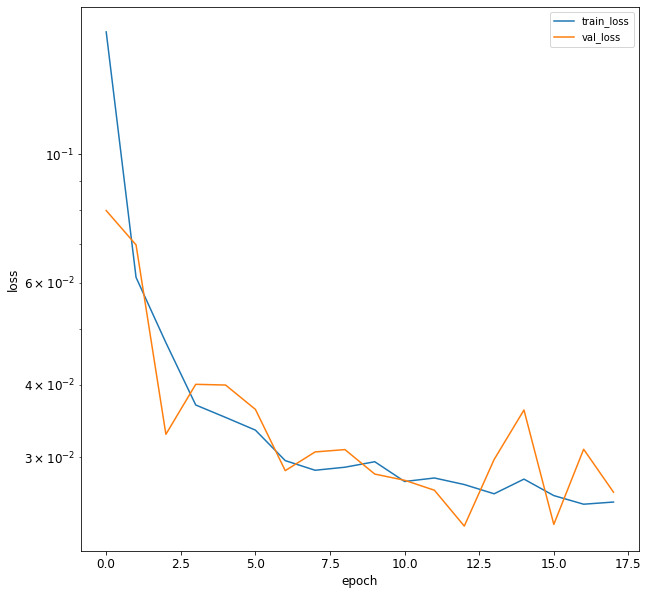

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5953][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5953,1469.0,13.292452,79.551410,1.0,1.0,0.0,1545.0,1643.0,1722.0,1519.0,1524.0,1505.0,1584.166667
5954,1462.0,12.782452,81.646795,1.0,1.0,0.0,1549.0,1608.0,1699.0,1507.0,1506.0,1482.0,1564.416667
5955,1458.0,12.272452,83.742180,1.0,1.0,0.0,1529.0,1600.0,1672.0,1494.0,1469.0,1476.0,1546.583333
5956,1443.0,12.272452,83.742180,2.0,1.0,0.0,1491.0,1571.0,1634.0,1473.0,1413.0,1482.0,1530.666667
5957,1427.0,12.272452,83.742180,2.0,1.0,0.0,1469.0,1545.0,1643.0,1439.0,1437.0,1472.0,1512.666667
5958,1396.0,12.117452,84.547775,2.0,1.0,0.0,1462.0,1549.0,1608.0,1422.0,1417.0,1459.0,1495.000000
5959,1393.0,11.962452,85.353370,2.0,1.0,0.0,1458.0,1529.0,1600.0,1420.0,1391.0,1460.0,1477.750000
5960,1390.0,11.962452,85.353370,3.0,1.0,0.0,1443.0,1491.0,1571.0,1414.0,1386.0,1439.0,1462.666667
5961,1376.0,11.962452,85.353370,3.0,1.0,0.0,1427.0,1469.0,1545.0,1396.0,1359.0,1443.0,1448.583333
5962,1362.0,11.457452,87.905065,3.0,1.0,0.0,1396.0,1462.0,1549.0,1387.0,1368.0,1428.0,1433.000000


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 5953 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2975 non-null   float64
 1   Temp    2975 non-null   float64
 2   Hum     2975 non-null   float64
 3   A       2975 non-null   float64
 4   B       2975 non-null   float64
 5   C       2975 non-null   float64
 6   D       2975 non-null   float64
 7   E       2975 non-null   float64
 8   F       2975 non-null   float64
 9   G       2975 non-null   float64
 10  H       2975 non-null   float64
 11  I       2975 non-null   float64
 12  J       2975 non-null   float64
dtypes: float64(13)
memory usage: 325.4 KB


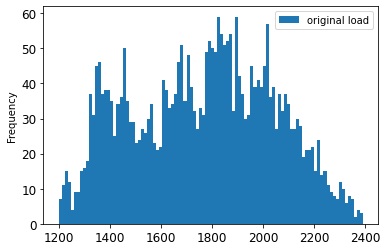

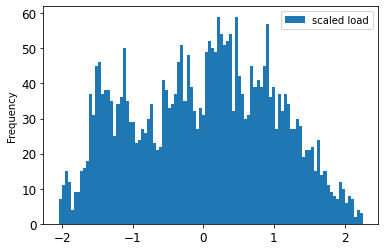

In [33]:
stlf_data[stlf_data.index >= 5953][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5953][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5953,-1.074697,0.428909,-0.123522,-1.662375,-1.399199,-1.449893,-0.798043,-0.442075,-0.154712,-0.886868,-0.868138,-0.936938,-0.683813,-1.100031
5954,-1.100031,0.315417,-0.003679,-1.662375,-1.399199,-1.449893,-0.783574,-0.568678,-0.237953,-0.930848,-0.934580,-1.021600,-0.758314,-1.114508
5955,-1.114508,0.201925,0.116163,-1.662375,-1.399199,-1.449893,-0.855922,-0.597616,-0.335672,-0.978493,-1.071156,-1.043685,-0.825585,-1.168796
5956,-1.168796,0.201925,0.116163,-1.517869,-1.399199,-1.449893,-0.993384,-0.702515,-0.473202,-1.055459,-1.277864,-1.021600,-0.885627,-1.226703
5957,-1.226703,0.201925,0.116163,-1.517869,-1.399199,-1.449893,-1.072968,-0.796563,-0.440629,-1.180069,-1.189275,-1.058409,-0.953526,-1.338898
5958,-1.338898,0.167432,0.162238,-1.517869,-1.399199,-1.449893,-1.098290,-0.782094,-0.567301,-1.242374,-1.263099,-1.106261,-1.020169,-1.349755
5959,-1.349755,0.132939,0.208313,-1.517869,-1.399199,-1.449893,-1.112759,-0.854438,-0.596255,-1.249704,-1.359071,-1.102580,-1.085240,-1.360613
5960,-1.360613,0.132939,0.208313,-1.373364,-1.399199,-1.449893,-1.167021,-0.991892,-0.701212,-1.271695,-1.377527,-1.179880,-1.142137,-1.411282
5961,-1.411282,0.132939,0.208313,-1.373364,-1.399199,-1.449893,-1.224900,-1.071471,-0.795311,-1.337665,-1.477190,-1.165156,-1.195263,-1.461950
5962,-1.461950,0.020560,0.354254,-1.373364,-1.399199,-1.449893,-1.337040,-1.096791,-0.780834,-1.370650,-1.443969,-1.220370,-1.254046,-1.458331


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8923,0.333167,-1.228966,0.429186,1.516752,-0.402404,0.689706,0.793623,1.091624,1.397928,0.241957,-0.281233,0.152618,0.906176,0.228210
8924,0.228210,-1.228966,0.429186,1.661258,-0.402404,0.689706,0.692336,1.048217,1.238683,0.164992,-0.358749,0.078999,0.818786,0.043632
8925,0.043632,-1.228966,0.429186,1.661258,-0.402404,0.689706,0.522317,1.037366,1.177156,-0.007264,-0.502707,-0.042472,0.720709,0.032774
8926,0.032774,-1.305173,0.429186,1.661258,-0.402404,0.689706,0.402942,0.936084,1.162679,-0.153865,-0.513781,-0.090324,0.622945,-0.151805
8927,-0.151805,-1.305173,0.434035,1.661258,-0.402404,0.689706,0.334211,0.795012,1.093914,-0.201510,-0.628209,-0.219156,0.515123,-0.151805


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5953,-1.100031
5954,-1.114508
5955,-1.168796
5956,-1.226703
5957,-1.338898
...,...
8923,0.228210
8924,0.043632
8925,0.032774
8926,-0.151805


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5953,-1.074697,0.428909,-0.123522,-1.662375,-1.399199,-1.449893,-0.798043,-0.442075,-0.154712,-0.886868,-0.868138,-0.936938,-0.683813
5954,-1.100031,0.315417,-0.003679,-1.662375,-1.399199,-1.449893,-0.783574,-0.568678,-0.237953,-0.930848,-0.934580,-1.021600,-0.758314
5955,-1.114508,0.201925,0.116163,-1.662375,-1.399199,-1.449893,-0.855922,-0.597616,-0.335672,-0.978493,-1.071156,-1.043685,-0.825585
5956,-1.168796,0.201925,0.116163,-1.517869,-1.399199,-1.449893,-0.993384,-0.702515,-0.473202,-1.055459,-1.277864,-1.021600,-0.885627
5957,-1.226703,0.201925,0.116163,-1.517869,-1.399199,-1.449893,-1.072968,-0.796563,-0.440629,-1.180069,-1.189275,-1.058409,-0.953526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,0.333167,-1.228966,0.429186,1.516752,-0.402404,0.689706,0.793623,1.091624,1.397928,0.241957,-0.281233,0.152618,0.906176
8924,0.228210,-1.228966,0.429186,1.661258,-0.402404,0.689706,0.692336,1.048217,1.238683,0.164992,-0.358749,0.078999,0.818786
8925,0.043632,-1.228966,0.429186,1.661258,-0.402404,0.689706,0.522317,1.037366,1.177156,-0.007264,-0.502707,-0.042472,0.720709
8926,0.032774,-1.305173,0.429186,1.661258,-0.402404,0.689706,0.402942,0.936084,1.162679,-0.153865,-0.513781,-0.090324,0.622945


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2975, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2975,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[-0.96028197],
       [-1.0065863 ],
       [-1.0367167 ],
       ...,
       [-0.03715939],
       [-0.04264634],
       [-0.20092633]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 5953][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1765.94437
dtype: float64
Cons    276.351613
dtype: float64


In [42]:
load_mean=1765.94437
load_std=276.351613
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2975, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2975, 1)


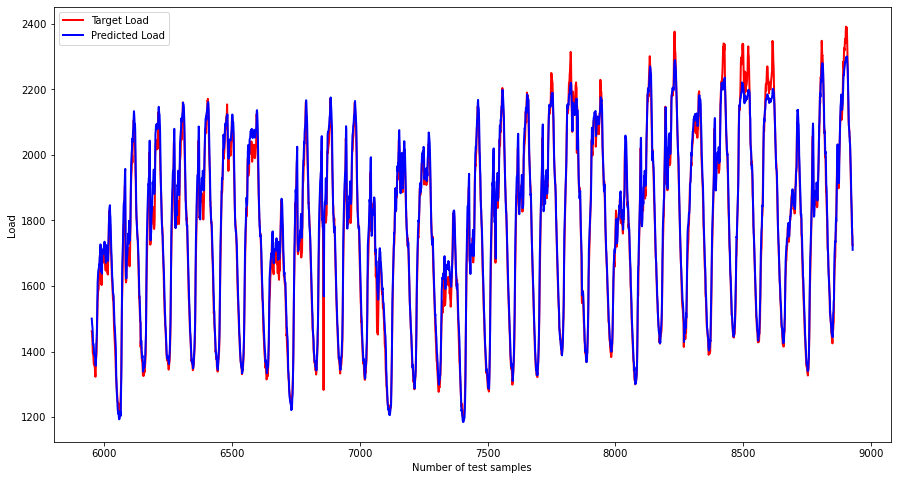

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.6432986162707572


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1   -1.010243
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5953  146092.248792
5954  145692.777586
5955  144192.041491
5956  142591.104037
5957  139489.500654
...             ...
8923  182800.466666
8924  177698.576367
8925  177401.241059
8926  172297.545131
8927  172300.082321

[2975 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5953  1491.499996
5954   889.491899
5955  1332.274404
5956  2082.495880
5957  3570.098449
...           ...
8923   117.785980
8924   836.138752
8925   373.503151
8926   909.986741
8927   184.280090

[2975 rows x 1 columns]
y_t+1    1575.913848
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    39.697781
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2879):
    b=a[i]
    print(b)

[1500.5688]
[1487.7726]
[1479.446]
[1472.5774]
[1455.6881]
[1425.9791]
[1422.076]
[1422.8474]
[1413.1178]
[1392.9551]
[1389.4929]
[1387.4705]
[1388.1268]
[1384.1621]
[1365.6628]
[1357.2472]
[1356.8569]
[1396.2198]
[1424.9045]
[1434.1375]
[1458.8418]
[1507.8782]
[1576.676]
[1611.1188]
[1627.7612]
[1640.2751]
[1648.9364]
[1651.2664]
[1656.3453]
[1665.8329]
[1663.9802]
[1686.508]
[1693.439]
[1716.3569]
[1727.1178]
[1724.672]
[1702.5054]
[1669.5465]
[1641.8959]
[1663.5236]
[1637.583]
[1696.3584]
[1706.6787]
[1706.9902]
[1697.2096]
[1712.328]
[1709.1575]
[1716.2943]
[1718.0182]
[1724.9738]
[1735.1372]
[1724.1626]
[1701.7101]
[1693.1577]
[1683.9586]
[1670.715]
[1672.5586]
[1724.9366]
[1723.8273]
[1717.6636]
[1713.9332]
[1690.1333]
[1688.8632]
[1679.1802]
[1676.5779]
[1726.9282]
[1746.5577]
[1787.217]
[1808.9866]
[1836.9927]
[1840.3085]
[1846.4224]
[1817.7031]
[1810.6998]
[1785.261]
[1752.5903]
[1720.215]
[1702.1257]
[1679.1444]
[1651.9817]
[1626.9827]
[1620.6989]
[1602.3364]
[1580.8267]
[157

[1279.5295]
[1339.2341]
[1449.83]
[1562.6366]
[1638.7843]
[1686.8146]
[1749.5682]
[1774.0564]
[1813.9497]
[1843.6642]
[1842.65]
[1846.2126]
[1862.3033]
[1899.5789]
[1929.1772]
[1942.3995]
[1803.4435]
[1692.2493]
[1667.6262]
[1668.257]
[1636.7103]
[1685.1711]
[1705.7092]
[1705.8522]
[1718.4448]
[1727.6617]
[1699.0604]
[1694.3333]
[1721.1802]
[1759.3623]
[1771.177]
[1753.9116]
[1690.7325]
[1705.6177]
[1718.8097]
[1750.2859]
[1815.8588]
[1899.0509]
[1966.8893]
[1999.4154]
[2012.2795]
[2025.6919]
[2019.4797]
[2049.3708]
[2057.5798]
[2086.5608]
[2107.707]
[2109.3127]
[2136.84]
[2160.226]
[2167.773]
[2145.6462]
[2145.1482]
[2136.5388]
[2103.9849]
[2056.958]
[2012.6387]
[1993.1027]
[1955.0527]
[1934.3187]
[1880.9286]
[1840.8965]
[1832.5444]
[1805.1135]
[1784.943]
[1775.0032]
[1739.6306]
[1705.9594]
[1666.1068]
[1646.056]
[1623.5708]
[1597.7484]
[1561.2146]
[1530.3972]
[1511.8662]
[1481.6279]
[1459.0793]
[1430.0388]
[1414.0116]
[1403.9186]
[1387.857]
[1365.5697]
[1348.8899]
[1339.6318]
[1345.8

[1854.4989]
[1831.668]
[1799.7236]
[1766.1265]
[1726.4401]
[1700.6554]
[1681.9713]
[1673.5963]
[1646.1996]
[1619.5476]
[1604.0477]
[1571.6581]
[1553.9471]
[1539.7698]
[1508.9211]
[1497.6156]
[1481.4601]
[1464.0446]
[1457.7996]
[1459.0521]
[1449.8777]
[1425.9917]
[1439.2864]
[1426.5066]
[1448.4683]
[1461.579]
[1468.8796]
[1483.3884]
[1492.7388]
[1520.1525]
[1566.8811]
[1635.7208]
[1719.7507]
[1772.6676]
[1796.9724]
[1813.7831]
[1837.2628]
[1864.156]
[1867.8097]
[1922.9491]
[1964.2748]
[1995.288]
[2067.815]
[2116.9746]
[2145.1348]
[2133.6843]
[2064.214]
[1965.9088]
[1953.7578]
[1905.6873]
[1990.3463]
[2021.5681]
[1896.4005]
[1923.2539]
[1997.0349]
[1990.3167]
[2045.5458]
[2059.878]
[2058.8474]
[2066.1782]
[2063.0613]
[2036.9176]
[2002.5726]
[2007.9707]
[2030.34]
[2055.6738]
[2097.5906]
[2169.2021]
[2183.439]
[2191.1936]
[2199.693]
[2204.3928]
[2201.9226]
[2197.]
[2206.0874]
[2197.999]
[2210.6648]
[2240.033]
[2277.542]
[2282.9675]
[2289.2495]
[2288.729]
[2274.7012]
[2270.2776]
[2257.57]
[